# Data Exploration and Visualization
Using uber data to explore data and make visualization.
- Uber trip data from 2015

In [2]:
from IPython.display import Image
Image(url="https://www.carsthatdrivethemselves.com/wp-content/uploads/2018/03/Logotype_digital_black_large.png")

## 1. Data Collection

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('documents/uber_raw.csv')

## 2. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [16]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID              int64
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [18]:
#converting Pickup_date column to datetime 
df['Pickup_date'] = pd.to_datetime(df['Pickup_date'], format="%Y-%m-%d %H:%M:%S")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
Dispatching_base_num    object
Pickup_date             datetime64[ns]
Affiliated_base_num     object
locationID              int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 435.5+ MB


In [23]:
#extracting the Hour from Pickup_date column and putting it into a new column named 'Hour'
df['Hour'] = df.Pickup_date.apply(lambda x: x.hour)
#extracting the Minute from Pickup_date column and putting it into a new column named 'Minute'
df['Minute'] = df.Pickup_date.apply(lambda x: x.minute)
#extracting the Month from Pickup_date column and putting it into a new column named 'Month'
df['Month'] = df.Pickup_date.apply(lambda x: x.month)
#extracting the Date from Pickup_date column and putting it into a new column named 'Day'
df['Date'] = df.Pickup_date.apply(lambda x: x.day)

In [24]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Hour,Minute,Month,Date
0,B02617,2015-05-17 09:47:00,B02617,141,9,47,5,17
1,B02617,2015-05-17 09:47:00,B02617,65,9,47,5,17
2,B02617,2015-05-17 09:47:00,B02617,100,9,47,5,17
3,B02617,2015-05-17 09:47:00,B02774,80,9,47,5,17
4,B02617,2015-05-17 09:47:00,B02617,90,9,47,5,17


## 3.import python lib for visualization

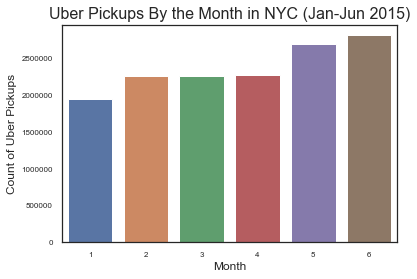

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Uber pickups by the hour in NYC
sns.set_style('white')
ax = sns.countplot(x="Month", data=df)
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Uber Pickups By the Month in NYC (Jan-Jun 2015)', fontsize=16)
ax.tick_params(labelsize = 8)
plt.show()

- The number of Uber pickup has been steadily increasing throughout the first half of 2015 in NYC.

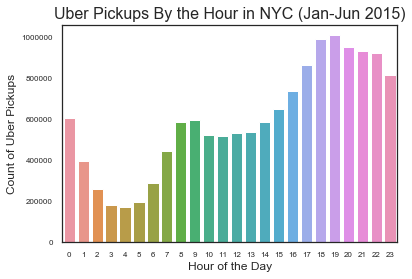

In [49]:
# Uber pickups by the hour in NYC
sns.set_style('white')
ax = sns.countplot(x="Hour", data=df)
ax.set_xlabel('Hour of the Day', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Uber Pickups By the Hour in NYC (Jan-Jun 2015)', fontsize=16)
ax.tick_params(labelsize = 8)
plt.show()

- Interestingly, after the morning rush(8am-9am), the number of Uber pickups doesn't rise much throughout the rest of the morning and early afternoon. There is significantly more demand in the evening than the daytime. 

In [51]:
#Uber pickups by the hour/Day in NYC
#extracting the weekday from Pickup_date column and putting it into a new column named 'day'
df['Day'] = df.Pickup_date.apply(lambda x: x.strftime('%A'))

In [52]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Hour,Minute,Month,Date,Day
0,B02617,2015-05-17 09:47:00,B02617,141,9,47,5,17,Sunday
1,B02617,2015-05-17 09:47:00,B02617,65,9,47,5,17,Sunday
2,B02617,2015-05-17 09:47:00,B02617,100,9,47,5,17,Sunday
3,B02617,2015-05-17 09:47:00,B02774,80,9,47,5,17,Sunday
4,B02617,2015-05-17 09:47:00,B02617,90,9,47,5,17,Sunday


In [53]:
groupby_day = df.groupby(['Day', 'Hour'])

In [58]:
df_day_cnt = pd.DataFrame({'Count' : groupby_day.size()}).reset_index()

In [59]:
df_day_cnt

,Day,Hour,Count
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


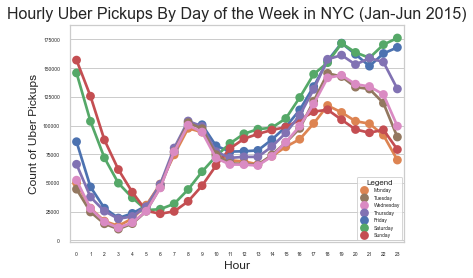

<Figure size 72000x14400 with 0 Axes>

In [81]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Hour", y="Count", hue="Day", data=df_day_cnt)
handles,labels = ax.get_legend_handles_labels()
#reordering legend content
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
ax.set_xlabel('Hour', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Hourly Uber Pickups By Day of the Week in NYC (Jan-Jun 2015)', fontsize=16)
ax.tick_params(labelsize = 5)
ax.legend(handles,labels,loc=0, title="Legend", prop={'size':5})
ax.get_legend().get_title().set_fontsize('8')
plt.figure(figsize=(1000, 200))
plt.show()

- It's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon, but it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening, but Sunday pickups takes a downward turn after dinner time.

- We can see that there the weekdays that has the most demand during the late evening is Friday and Saturday, which is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.

- It seems like New Yorkers are starting their 'weekends' on Thursday nights.